### Imports
Importazioni dei pacchetti e inizializzazioni varie

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from repository import load_csv_to_dict

import os
import traceback

from heuristic import *
from problem import ProblemFactory
from search import ReachGoal
from visualize import Animation
from input_handler import InputHandler
import repository
import pandas as pd

### Carico il report da file


In [47]:
for i in range(0,10):
    os.system("python pf4ea gen -f exp_0.csv -v --heuristic h5 --csv_output")

C:\Users\nikbe\AppData\Local\Temp\ipykernel_6088\3515343806.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df.groupby(['rows']).mean()


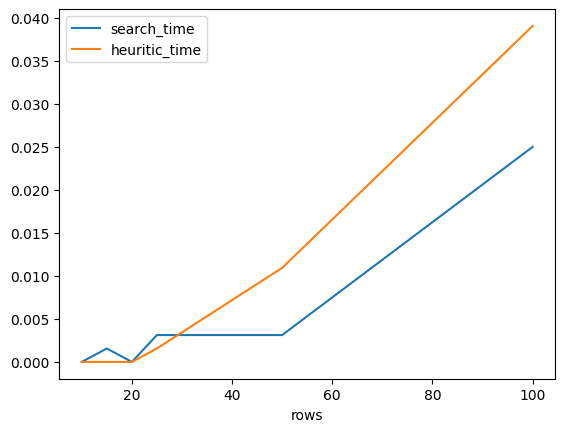

In [48]:
import matplotlib.pyplot as plt

df = pd.read_csv("benchmarks\output_csv\output_exp_0.csv")
df = df.dropna()
grouped_df = df.groupby(['rows']).mean()
# print(grouped_df)
grouped_df["search_time"].plot()
grouped_df["heuristic_time"].plot()
plt.legend(['search_time','heuritic_time'])
plt.show()
# plot = grouped_df.plot(y='total_states', title='Time to reach goal', legend=False)



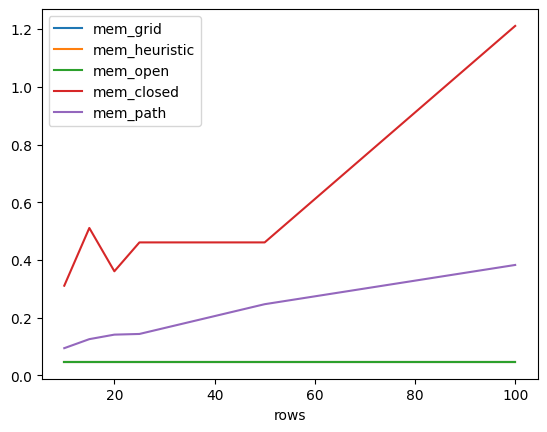

In [49]:

grouped_df['mem_grid'].plot()
grouped_df['mem_heuristic'].plot()
grouped_df['mem_open'].plot()
grouped_df['mem_closed'].plot()
grouped_df['mem_path'].plot()
plt.legend(['mem_grid','mem_heuristic','mem_open','mem_closed','mem_path'])
plt.show()

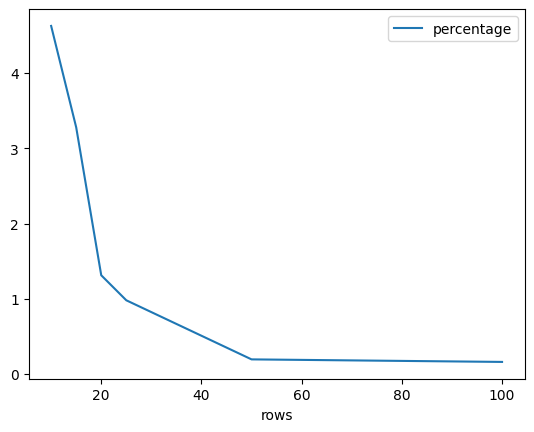

In [50]:
grouped_df['percentage_visited_nodes'].plot()
plt.legend(['percentage'])
plt.show()

INIZIO TEST SUL NUMERO DI AGENTI

In [51]:
for i in range(0,10):
    os.system("python pf4ea gen -f exp_1.csv -v --heuristic h5 --csv_output")

In [52]:
df_agents = pd.read_csv("benchmarks\output_csv\output_exp_1.csv")
df_agents = df_agents.dropna()
grouped_agents_df = df_agents.groupby(['num_agents']).mean()

C:\Users\nikbe\AppData\Local\Temp\ipykernel_6088\4056592316.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_agents_df = df_agents.groupby(['num_agents']).mean()


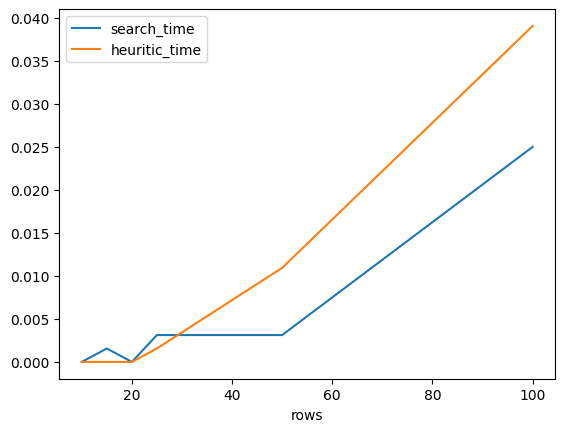

In [53]:
grouped_df["search_time"].plot()
grouped_df["heuristic_time"].plot()
plt.legend(['search_time','heuritic_time'])
plt.show()

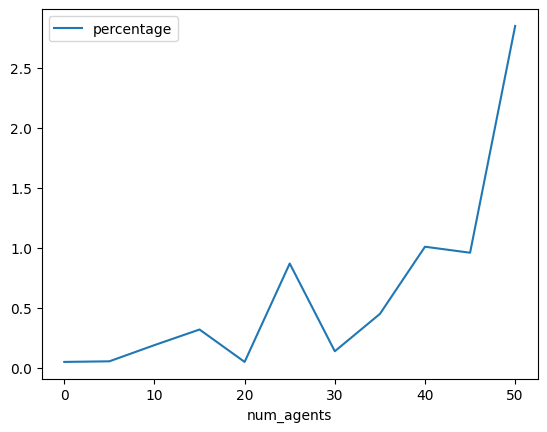

In [54]:
grouped_agents_df['percentage_visited_nodes'].plot()
plt.legend(['percentage'])
plt.show()

In [ ]:
grouped_agents_df['path_lenght'].plot()
grouped_agents_df['path_cost'].plot()
plt.legend(['path_lenght', 'path_cost'])
plt.show()